## Classifying MNIST dataset using convolutional neural network with PyTorch

In [1]:
# Import stuff
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms, utils
import numpy as np
import matplotlib.pyplot as plt

# Set random seed
torch.manual_seed(42)
np.random.seed(42)

# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [2]:
# Transformations to apply to the data
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.1307,), (0.3081,))])  # 0.1307 and 0.3081 are mean and std of MNIST (after scaling)

# Download the data
DATA_PATH = '../data'
train_set = datasets.MNIST(DATA_PATH, train=True, download=True, transform=transform)
test_set = datasets.MNIST(DATA_PATH, train=False, download=True, transform=transform)

# Create data loaders
batch_size = 64
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=1)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=True, num_workers=1)

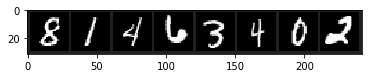

tensor([8, 1, 4, 6, 3, 4, 0, 2])


In [3]:
# Function to show an image
def imshow(image):
    image = image * 0.3081 + 0.1307  # un-normalize
    np_image = image.numpy()
    plt.imshow(np_image, cmap='gray')
    plt.show()

# Get some images
mini_loader = torch.utils.data.DataLoader(train_set, batch_size=8, shuffle=True, num_workers=1)
images, labels = iter(mini_loader).next()
images_grid = utils.make_grid(images).permute(1, 2, 0)

# Show the images
imshow(images_grid)
print(labels)

In [4]:
# Create a class for the convolutional neural network
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 50, 5)
        self.pool = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(50*4*4, 500)
        self.fc2 = nn.Linear(500, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [5]:
# A function to train the model over an epoch
def train(model, device, train_loader, optimizer, epoch, log_interval):
    model.train()  # Set the model to training mode
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)  # send data to the selected device
        optimizer.zero_grad()  # reset parameter gradients
        output = model(data)  # perform forward computation
        loss = F.cross_entropy(output, target)  # compute loss
        loss.backward()  # perform back-propagation
        optimizer.step()  # take an optimization step
        if batch_idx % log_interval == 0:
            print("Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}".format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item() / len(data)))

In [6]:
# A function to evaluate the model
def test(model, device, test_loader):
    model.eval()  # Set the model to evaluation mode
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.cross_entropy(output, target).sum().item()
            predictions = output.argmax(dim=1)
            correct += (predictions == target).sum().item()
            
    test_loss /= len(test_loader.dataset)
    
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.1f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [7]:
# Create the model
model = ConvNet().to(device)

# Create the optimizer
learning_rate = 0.01
momentum = 0.5
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

In [8]:
# Train and test the model
n_epochs = 10
log_interval = 25
for epoch in range(n_epochs):
    train(model, device, train_loader, optimizer, epoch, log_interval)
    test(model, device, test_loader)

Train Epoch: 0 [0/60000 (0%)]	Loss: 0.035972
Train Epoch: 0 [1600/60000 (3%)]	Loss: 0.033293
Train Epoch: 0 [3200/60000 (5%)]	Loss: 0.024249
Train Epoch: 0 [4800/60000 (8%)]	Loss: 0.011222
Train Epoch: 0 [6400/60000 (11%)]	Loss: 0.007369
Train Epoch: 0 [8000/60000 (13%)]	Loss: 0.006698
Train Epoch: 0 [9600/60000 (16%)]	Loss: 0.004295
Train Epoch: 0 [11200/60000 (19%)]	Loss: 0.004092
Train Epoch: 0 [12800/60000 (21%)]	Loss: 0.004098
Train Epoch: 0 [14400/60000 (24%)]	Loss: 0.005364
Train Epoch: 0 [16000/60000 (27%)]	Loss: 0.003406
Train Epoch: 0 [17600/60000 (29%)]	Loss: 0.004747
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.001363
Train Epoch: 0 [20800/60000 (35%)]	Loss: 0.003599
Train Epoch: 0 [22400/60000 (37%)]	Loss: 0.002045
Train Epoch: 0 [24000/60000 (40%)]	Loss: 0.003190
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.003068
Train Epoch: 0 [27200/60000 (45%)]	Loss: 0.003644
Train Epoch: 0 [28800/60000 (48%)]	Loss: 0.001307
Train Epoch: 0 [30400/60000 (51%)]	Loss: 0.002937
Train Epoch: 0

Train Epoch: 4 [14400/60000 (24%)]	Loss: 0.001222
Train Epoch: 4 [16000/60000 (27%)]	Loss: 0.000374
Train Epoch: 4 [17600/60000 (29%)]	Loss: 0.000759
Train Epoch: 4 [19200/60000 (32%)]	Loss: 0.000409
Train Epoch: 4 [20800/60000 (35%)]	Loss: 0.001085
Train Epoch: 4 [22400/60000 (37%)]	Loss: 0.000468
Train Epoch: 4 [24000/60000 (40%)]	Loss: 0.000240
Train Epoch: 4 [25600/60000 (43%)]	Loss: 0.000519
Train Epoch: 4 [27200/60000 (45%)]	Loss: 0.000366
Train Epoch: 4 [28800/60000 (48%)]	Loss: 0.000181
Train Epoch: 4 [30400/60000 (51%)]	Loss: 0.000045
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.000412
Train Epoch: 4 [33600/60000 (56%)]	Loss: 0.001252
Train Epoch: 4 [35200/60000 (59%)]	Loss: 0.000547
Train Epoch: 4 [36800/60000 (61%)]	Loss: 0.001221
Train Epoch: 4 [38400/60000 (64%)]	Loss: 0.001510
Train Epoch: 4 [40000/60000 (67%)]	Loss: 0.001717
Train Epoch: 4 [41600/60000 (69%)]	Loss: 0.000663
Train Epoch: 4 [43200/60000 (72%)]	Loss: 0.000063
Train Epoch: 4 [44800/60000 (75%)]	Loss: 0.000170


Train Epoch: 8 [28800/60000 (48%)]	Loss: 0.000423
Train Epoch: 8 [30400/60000 (51%)]	Loss: 0.000180
Train Epoch: 8 [32000/60000 (53%)]	Loss: 0.000275
Train Epoch: 8 [33600/60000 (56%)]	Loss: 0.000177
Train Epoch: 8 [35200/60000 (59%)]	Loss: 0.000460
Train Epoch: 8 [36800/60000 (61%)]	Loss: 0.000165
Train Epoch: 8 [38400/60000 (64%)]	Loss: 0.001470
Train Epoch: 8 [40000/60000 (67%)]	Loss: 0.000220
Train Epoch: 8 [41600/60000 (69%)]	Loss: 0.000731
Train Epoch: 8 [43200/60000 (72%)]	Loss: 0.000240
Train Epoch: 8 [44800/60000 (75%)]	Loss: 0.000439
Train Epoch: 8 [46400/60000 (77%)]	Loss: 0.000064
Train Epoch: 8 [48000/60000 (80%)]	Loss: 0.000105
Train Epoch: 8 [49600/60000 (83%)]	Loss: 0.000550
Train Epoch: 8 [51200/60000 (85%)]	Loss: 0.000066
Train Epoch: 8 [52800/60000 (88%)]	Loss: 0.000159
Train Epoch: 8 [54400/60000 (91%)]	Loss: 0.000649
Train Epoch: 8 [56000/60000 (93%)]	Loss: 0.000338
Train Epoch: 8 [57600/60000 (96%)]	Loss: 0.000696
Train Epoch: 8 [59200/60000 (99%)]	Loss: 0.000903


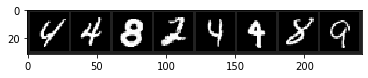

Actual: tensor([4, 4, 8, 2, 4, 4, 8, 9])
Predicted: tensor([4, 4, 8, 2, 4, 4, 8, 9], device='cuda:0')


In [9]:
# Get some images
mini_loader = torch.utils.data.DataLoader(test_set, batch_size=8, shuffle=True, num_workers=1)
images, labels = iter(mini_loader).next()
images_grid = utils.make_grid(images).permute(1, 2, 0)

# Use the model to predict the labels
images = images.to(device)
output = model(images)
predictions = output.argmax(dim=1)

# Show the images
imshow(images_grid)
print("Actual:", labels)
print("Predicted:", predictions)